In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
print(x_test[0])

[39. 40. 39. ... 43. 45. 45.]


In [3]:
def makeContrastedDataset(dataset, upperLimitOfContrast, lowerLimitOfContrast):
    manipulationDataset = []
    for val in dataset:
        index = []
        for a in val:
            b = random.randint(lowerLimitOfContrast, upperLimitOfContrast)
            newVal = b + a
            if newVal > 255:
                newVal = 255
            if newVal < 0:
                newVal = 0
            index.append(newVal)
        manipulationDataset.append(index)
    return manipulationDataset

In [4]:
print(x_test[0])

[39. 40. 39. ... 43. 45. 45.]


In [5]:
brightx_test = makeContrastedDataset(x_test, 15, 10)

In [6]:
darkerx_test = makeContrastedDataset(x_test, -10, -15)

In [7]:
x_test[0]

array([39., 40., 39., ..., 43., 45., 45.])

In [8]:
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [9]:
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [10]:
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(brightx_test, y_test, axis=1)
test_data_combined1 = np.append(darkerx_test, y_test, axis = 1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
np.random.shuffle(test_data_combined1)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

brightx_test = test_data_combined[:,:-1]
darkerx_test = test_data_combined1[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
brightx_test  = brightx_test.astype('float')/255
darkerx_test  = darkerx_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

brightx_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = brightx_test).reshape((-1,num_pixels*num_pixels))

darkerx_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = darkerx_test).reshape((-1,num_pixels*num_pixels))

In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [30]:
model2 = Sequential()

In [31]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model2.add(Dense(512, activation = 'relu'))
# Layer 3
model2.add(Dense(512, activation = 'relu'))
# Layer 4
model2.add(Dense(512, activation = 'relu'))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [32]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [33]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [34]:
Brighter_Model = model2.fit(x_train,y_train, epochs = 20, validation_data = (brightx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 6s 465us/step - loss: 0.8683 - accuracy: 0.7006 - val_loss: 0.5870 - val_accuracy: 0.7607
Epoch 2/20
12660/12660 [==============================] - 5s 425us/step - loss: 0.3631 - accuracy: 0.8656 - val_loss: 0.5322 - val_accuracy: 0.8144
Epoch 3/20
12660/12660 [==============================] - 5s 429us/step - loss: 0.2853 - accuracy: 0.8938 - val_loss: 0.3787 - val_accuracy: 0.8935
Epoch 4/20
12660/12660 [==============================] - 5s 432us/step - loss: 0.2404 - accuracy: 0.9126 - val_loss: 0.4867 - val_accuracy: 0.8621
Epoch 5/20
12660/12660 [==============================] - 5s 426us/step - loss: 0.1824 - accuracy: 0.9342 - val_loss: 0.5141 - val_accuracy: 0.8626
Epoch 6/20
12660/12660 [==============================] - 5s 430us/step - loss: 0.1915 - accuracy: 0.9305 - val_loss: 0.5813 - val_accuracy: 0.8293
Epoch 7/20
12660/12660 [==============================] - 6s 43

Text(0, 0.5, 'Accuracy')

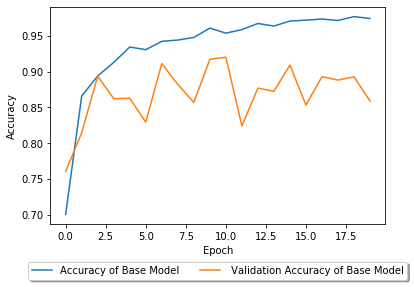

In [35]:
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [36]:
model3 = Sequential()

In [37]:
model3.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model3.add(Dense(512, activation = 'relu'))

#Output Layer
model3.add(Dense(10, activation = 'softmax'))

In [38]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [39]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [40]:
Darker_Model = model3.fit(x_train,y_train, epochs = 20, validation_data = (darkerx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 4s 293us/step - loss: 0.8168 - accuracy: 0.7367 - val_loss: 8.2529 - val_accuracy: 0.1441
Epoch 2/20
12660/12660 [==============================] - 3s 266us/step - loss: 0.3935 - accuracy: 0.8708 - val_loss: 12.3771 - val_accuracy: 0.1489
Epoch 3/20
12660/12660 [==============================] - 3s 270us/step - loss: 0.2884 - accuracy: 0.9052 - val_loss: 13.6422 - val_accuracy: 0.1427
Epoch 4/20
12660/12660 [==============================] - 3s 264us/step - loss: 0.2313 - accuracy: 0.9220 - val_loss: 16.9964 - val_accuracy: 0.1456
Epoch 5/20
12660/12660 [==============================] - 3s 259us/step - loss: 0.2060 - accuracy: 0.9340 - val_loss: 16.1048 - val_accuracy: 0.1456
Epoch 6/20
12660/12660 [==============================] - 3s 258us/step - loss: 0.1656 - accuracy: 0.9427 - val_loss: 16.8822 - val_accuracy: 0.1410
Epoch 7/20
12660/12660 [==============================] - 

Text(0, 0.5, 'Accuracy')

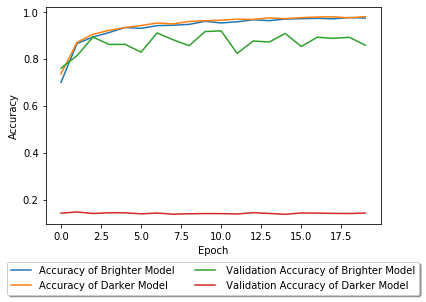

In [41]:
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Brighter Model')
plt.plot(Darker_Model.history['accuracy'], label='Accuracy of Darker Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Brighter Model')
plt.plot(Darker_Model.history['val_accuracy'], label=' Validation Accuracy of Darker Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding Dropout to reduce Overfitting

In [45]:
from keras.layers import Dropout

In [46]:
model4 = Sequential()

In [47]:
model4.add(Dense(512, activation = 'relu',input_shape=(784,)))
model4.add(Dropout(0.2))
# Layer 2
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
# Layer 3
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
# Layer 4
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
#Output Layer
model4.add(Dense(10, activation = 'softmax'))

In [48]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [49]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)              

In [50]:
NoOverFit = model4.fit(x_train,y_train, epochs = 20, validation_data = (brightx_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 7s 529us/step - loss: 1.0603 - accuracy: 0.6438 - val_loss: 0.6313 - val_accuracy: 0.8002
Epoch 2/20
12660/12660 [==============================] - 6s 467us/step - loss: 0.5359 - accuracy: 0.8019 - val_loss: 0.5456 - val_accuracy: 0.8070
Epoch 3/20
12660/12660 [==============================] - 6s 481us/step - loss: 0.4190 - accuracy: 0.8478 - val_loss: 0.4477 - val_accuracy: 0.8619
Epoch 4/20
12660/12660 [==============================] - 6s 475us/step - loss: 0.3607 - accuracy: 0.8664 - val_loss: 0.4091 - val_accuracy: 0.8600
Epoch 5/20
12660/12660 [==============================] - 6s 475us/step - loss: 0.3320 - accuracy: 0.8806 - val_loss: 0.5914 - val_accuracy: 0.8058
Epoch 6/20
12660/12660 [==============================] - 6s 480us/step - loss: 0.3041 - accuracy: 0.8916 - val_loss: 0.4374 - val_accuracy: 0.8518
Epoch 7/20
12660/12660 [==============================] - 6s 47

Text(0, 0.5, 'Accuracy')

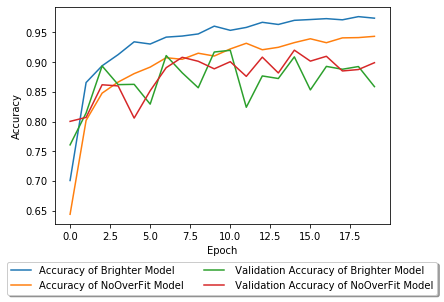

In [52]:
plt.plot(Brighter_Model.history['accuracy'], label='Accuracy of Brighter Model')
plt.plot(NoOverFit.history['accuracy'], label='Accuracy of NoOverFit Model')
plt.plot(Brighter_Model.history['val_accuracy'], label=' Validation Accuracy of Brighter Model')
plt.plot(NoOverFit.history['val_accuracy'], label=' Validation Accuracy of NoOverFit Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [54]:
x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [55]:
prediction1 = model4.predict_classes(x_test, batch_size=10)

In [56]:
prediction2 = model4.predict_classes(brightx_test, batch_size=10)

In [57]:
rounded_labels=np.argmax(y_test, axis=1)

In [60]:
cm = confusion_matrix(rounded_labels, prediction1)

In [61]:
cm1 = confusion_matrix(rounded_labels, prediction2)

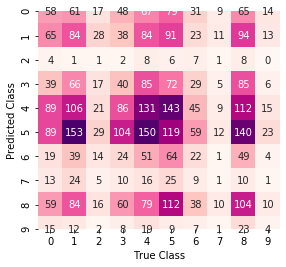

In [62]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

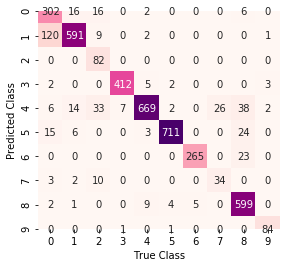

In [63]:
sns.heatmap(cm1.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [64]:
print(classification_report(rounded_labels,prediction1))

              precision    recall  f1-score   support

           0       0.13      0.13      0.13       450
           1       0.16      0.13      0.14       630
           2       0.03      0.01      0.01       150
           3       0.09      0.10      0.09       420
           4       0.17      0.19      0.18       690
           5       0.14      0.17      0.15       720
           6       0.08      0.08      0.08       270
           7       0.01      0.02      0.01        60
           8       0.18      0.15      0.16       690
           9       0.04      0.04      0.04        90

    accuracy                           0.14      4170
   macro avg       0.10      0.10      0.10      4170
weighted avg       0.14      0.14      0.13      4170



In [65]:
print(classification_report(rounded_labels,prediction2))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       450
           1       0.82      0.94      0.87       630
           2       1.00      0.55      0.71       150
           3       0.97      0.98      0.98       420
           4       0.84      0.97      0.90       690
           5       0.94      0.99      0.96       720
           6       0.92      0.98      0.95       270
           7       0.69      0.57      0.62        60
           8       0.97      0.87      0.91       690
           9       0.98      0.93      0.95        90

    accuracy                           0.90      4170
   macro avg       0.90      0.84      0.86      4170
weighted avg       0.90      0.90      0.90      4170

